# Data Visualisation

In this notebook the vizualisation of the different KPIs performed in the DBM: Lab Assignment 2 will be deployed. 
The document is divided into three parts, each deploying the visualization of the different csv files. 

## KPI 1: Average number of new listings per day

In this section the "KPI1.csv" file will be investigated further. 
This file holds the results from the KPI1: Average number of new listing per day, where the goal is to investigate the daily rate of listings over a timeperiod. 

In [55]:
#import numpy 
import numpy as np
#import panda
import pandas as pd
from pandas import read_csv
#import bokeh
import bokeh
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import CDSView, ColumnDataSource, GroupFilter
from bokeh.plotting import figure
from bokeh.palettes import Spectral3
from bokeh.plotting import figure, show, output_file

#to utilize the bokeh extencion through the panda library 
import pandas_bokeh
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [56]:
#import the csv file 
data = pd.read_csv('KPI1v2.csv', header=0, delimiter=';')
data.head()

,date,listings_count
0,02/01/2020,1
1,08/01/2020,9
2,13/01/2020,10
3,23/01/2020,50
4,24/01/2020,2


Import of the csv file, and a visualization of what the datafile looks like. 

In [57]:
data.listings_count.mean() #mean value new listing based on the days in the file

49.53658536585366

In [58]:
#making sure that the date format is correct
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

In [59]:
%matplotlib inline

In [60]:
group = data.groupby('date').listings_count.sum()
source = ColumnDataSource(pd.DataFrame(group)) #creating columbdatasource to utilize the bokeh library 

p = figure(plot_height=400, toolbar_location=None, tools="")
p = figure(x_axis_type='datetime')
p.line(x='date', y='listings_count', source=source, line_width=2,legend_label='Average number of new listings per day' )
p.yaxis.axis_label = 'Amount of listings '


#create Hovertool 
#hover = HoverTool()
#hover.tooltips=[
 #       ('Date', '@date'),
  #      ('Listings', '@listings_count')], 
   #     formatters={'@date': 'datetime'}
hover = HoverTool()
hover.tooltips=[('date', '@DateTime'), ('Listings', '@listings_count')]
# need to add the dateTimeformat on date in the hovertool 
p.add_tools(hover)

show(p)
output_file('figure1.html')

In [62]:
hover.tooltips = [
    ("date", "@date"),
    ("(x,y)", "($x, $y)"),
    ("listings_count","@listings_count"),
]
data.plot_bokeh(kind='bar', x = 'date', y = 'listings_count') #bar-plot visualization of the dataset 
output_file('figure2.html')

In [63]:
data.plot_bokeh(kind='line', x = 'date', y = 'listings_count') #line vizualisation 
output_file('figure3.html')

Figure(id='7982', ...)

In [65]:
data.plot_bokeh(rangetool=True, x = 'date' ) #timeline based visualization of how the dataset behaves over the given timeperiod
output_file('figure4.html')

As seen in the figure the date whith the most listing was 2020-07-12 with 2136 listings in total. 
On average there where posted 49,53 listings on the dates sampled in the dataset, and on average over the timeperiode it was 9.43 new listings daily.  

## KPI2: Correlation between rent price and family income per neighbourhood

This section aims to visualize the KPI 2: correlation between rent price and family income per neighbourhood, through investigating the "KPI2.csv" file.

In [66]:
#import numpy 
import numpy as np
#import panda
import pandas as pd
from pandas import read_csv
#import bokeh
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, CDSView, ColumnDataSource, GroupFilter
from bokeh.models.tools import HoverTool

#imports from pandas_bokeh 
import pandas_bokeh
#making sure the plot is visible in the notebook
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [67]:
#import the csv file 

d = pd.read_csv('KPI2v2.csv', header=0, delimiter=';')
d.head() #tabular visualization of the dataset 

,neighborhood,mean_price,rfd
0,La Prosperitat,167150.000000,56.0
1,El Baix Guinardó,315222.222222,92.0
2,El Congrés i els Indians,320000.000000,75.1
3,Sant Genís dels Agudells,312172.413793,84.1
4,La Nova Esquerra de l'Eixample,460978.654362,110.2


In [69]:
from math import pi
p = d.plot_bokeh(title='Scatter plot of correlation between neighborhood and rfd', kind='scatter', x = 'neighborhood', y = 'rfd')  #scatter visualization of the RFD 
p.xaxis.major_label_orientation = pi/4
output_file('figure5.html')

In [71]:
d.plot_bokeh(title='Bar plot of correlation between neighborhood and rfd', kind='bar', x = 'neighborhood', y = 'rfd') #line- plot visualization of the correlation between neighborhood and RFD
output_file('figure6.html')

The following visualizations display the correlation between the mean_price and the neighborhood. 

In [72]:
d.plot_bokeh(title='Scatter plot of correlation between neighborhood and mean_price', kind= 'scatter', x="neighborhood", y="mean_price", disable_scientific_axes="y")
output_file('figure7.html')

Figure(id='10881', ...)

In [73]:
d.plot_bokeh(title='Bar plot of correlation between neighborhood and mean_price', kind="bar", x='neighborhood', y='mean_price' , disable_scientific_axes="y", hovertool = True)
output_file('figure8.html')

The following visualizations show the correlation between the sales price, and the rfd. 

In [75]:

d.plot_bokeh(kind= 'scatter',  stacked=True,normed=100, x="neighborhood", colormap = ['yellow', 'blue'], title='kfhh', ylabel ='value', disable_scientific_axes="y")
output_file('figure9.html')

In [76]:
df = pd.DataFrame({'neighborhood': d.neighborhood, 'mean_price': d.mean_price, 'rfd': d.rfd})
output_file('figure10.html')

In [77]:
df.plot_bokeh(kind= 'scatter',  stacked=True,normed=100, x="neighborhood", colormap = ['yellow', 'blue'], y= ['neighborhood', 'mean_price'], title='kfhh', ylabel ='value', disable_scientific_axes="y")
output_file('figure11.html')

In [78]:
d.corr()

,mean_price,rfd
mean_price,1.000000,0.913799
rfd,0.913799,1.000000


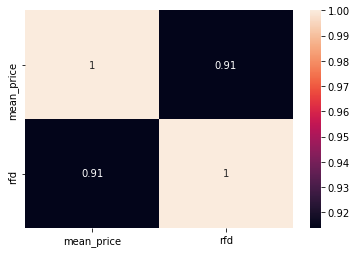

In [79]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = d.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [80]:
d['mean_price'].corr(d['rfd']) #the correlation between sales price and family income per neighbourhood

0.913799359629383

Based on KPI2 the correlation between the sales price per neighbourhood and family income is high, this the probability of a high family income in areas where the sales price is high.  

## KPI3: Correlation between family members per listing and neighbourhood

In [81]:
#import numpy 
import numpy as np
#import panda
import pandas as pd
from pandas import read_csv
#import bokeh
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, CDSView, ColumnDataSource, GroupFilter
from bokeh.models.tools import HoverTool

#imports from pandas_bokeh 
import pandas_bokeh
#making sure the plot is visible in the notebook
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [82]:
#import the csv file 

dat = pd.read_csv('KPI3.csv', header=0, delimiter=';')
dat.head() #tabular visualization of the dataset 

,neighborhood,inhabitants_family,rfd
0,La Barceloneta Barcelona,2.16,79.6
1,Fort Pienc,2.60,106.5
2,Sagrada Familia,2.38,101.8
3,L'Antiga Esquerra de l'Eixample,2.38,137.2
4,Hostafrancs,2.42,99.0


In [83]:
dat.plot_bokeh(title='Scatter plot of correlation between neighborhood and inhabitants_family', kind='scatter', x = 'neighborhood', y = 'inhabitants_family')  #scatter visualization of the RFD 
output_file('figure12.html')

In [25]:
dat.plot_bokeh(title='Bar plot of correlation between neighborhood and rfd', kind='bar', x = 'neighborhood', y = 'inhabitants_family') #line- plot visualization of the correlation between neighborhood and RFD


Figure(id='2781', ...)

Correlation between inhabitants in a family, and rdf. 

In [26]:
dat.corr()

,inhabitants_family,rfd
inhabitants_family,1.000000,0.052658
rfd,0.052658,1.000000


According to our hypothesis families with lower income would have an in crease in inhabitants per family. Some areas with earlier classified lower income, such as "Gothic Quarter", had an elevated number of inhabitants per family. 
However, with a correlation factor of 0.05 ≈ 5%, the correlation between income and inhabitants per family is not clear and more data is needed to either falsify or substantiate the hypothesis. 
From this analysis it therefore is no clear correlation between family income and inhabitants per family. 